# Naive Bayes Workbook

<details>
    <summary>README.md Copy</summary>
This is an exercise to walk through the Naive Bayes algorithm. You will be walked through the basics of Bayes Theorem under the assumption you have no prior knowledge. We will then introduce you to Naive Bayes as a machine learning algorithm. <br><br>

You will be asked to implement the algorithm from scratch. Please avoid the use of scikit-learn or other machine learning libraries for the implementation of naive bayes - pandas, numpy, or similar libraries are what we expect to see for your Python implementation. It is acceptable to use scikit-learn libraries (or other libraries) for evaluating your algorithm's correctness.<br>

Your notebook will be evaluated on the following:
<ul>
    <li>Correctness</li>
    <li>Legibility</li>
    <li>Documentation</li>
</ul>
<br>

Please fork this repo and use the notebook within. When you have completed your notebook, present your submission by sharing your repo with us and sending us an email with a direct link. It is important that you demonstrate your ability to use GitHub as well as to complete the notebook assignment.<br>

If you do not already have <a href="https://docs.anaconda.com/navigator/install/">Anaconda Navigator</a> installed, you will need to do so. You can opt for a different setup of your python environment, but Anaconda is recommended for beginners. Anaconda comes by default with JupyterLab and JupyterNotebook both of which will allow you to open and edit the Python notebook. Anaconda includes a basic enviroment with the most used Python data science packages, but you may install additional packages to complete this excercise. You can search <a href="https://anaconda.org/">https://anaconda.org</a> for terminal commands to install more packages or use the Anaconda GUI.<br>


**While important, this assignment is not the sole candidate selection criteria.**  Please do not be discouraged if you are having difficulties understanding or implementing the assignment.  We are here to assist you with questions or concerns that come up while trying to complete it.  Do not hesitate to reach out to brooke.r.weborg@nasa.gov, meghan.bush@nasa.gov, and jeremiah.d.sims@nasa.gov <br>

</details>

## Bayes Theorem

We will now do a brief introduction to the probability theory you need to understand to complete the notebook. A lot of this should be review, but in the case you may not have taken a probability and statistics class yet, the first half of this notebook will provide the information to understand what Bayes rule is before we ask you to code Naive Bayes. This section in not mandatory and can be skipped entirely.

### Review of Probability Theory
If you haven't taken an intro to statistics and probability class yet (or you need a refresher), and the following is very confusing for you, please check out this awesome and interactive reference from Brown University to get some foundational knowledge:<br>
https://seeing-theory.brown.edu/basic-probability/index.html

### Conditional Probability

Conditional probability tells us that, given some condition, this is the probability of an event happening. We will use weather as an example. Given that <i>B</i> is the condition that it's cloudy outside and <i>A</i>, is the event of rain, conditional probability would then ask, what is the probability of rain, <i>A</i>, given that it's cloudy outside, <i>B</i>.

Conditional probability looks at a subset of data that meets the condition. For our example, that's the set of data where it's cloudy outside on a given day. Then we can obtain that probability by counting the number of days where it rains and the total number of days it's cloudy (not necessarily rainy). Then our probability is the following:
    
$$
P(Rain|Cloudy)=\frac{\text{Total number of rainy days that are also cloudy}}{\text{Total number of cloudy days (may or may not be raining)}}
$$

Mathematically, we can write this generically as follows:
$$
  P(A|B)=\frac{P(A\text{∩}B)}{P(B)} \text{ if } P(B) > 0
$$

For an interactive example, check out this chapter from Brown University:<br>
https://seeing-theory.brown.edu/compound-probability/index.html#section3

### Law of Total Probability

Let's say we're looking for a total probability of an event, <i>P(A)</i>, but we only have probability of A given it's intersection with several other events, <i>P(A∩B)</i> and <i>P(A∩B<sup>C</sup>)</i>. The image below shows <i>P(A)</i> which we are trying to find.

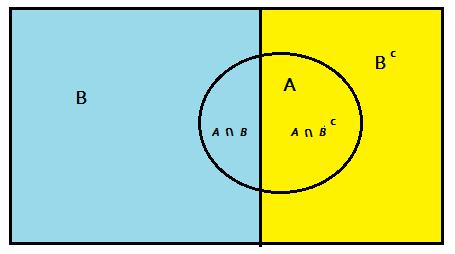
<i>https://www.statisticshowto.com/total-probability-rule/</i>

The Law of Total Probability assists us in calculating <i>P(A)</i> in this situation. Given that we have all the intersections between <i>A</i> and <i>B<sub>i</sub></i> events, we can take the sum of those events:

$$
  P(A)= \sum_{i} P(A\text{∩}B_i)$$

This rule can also be rewritten given the conditional probability. To remove the conditional, we need to multiply by the probability of the event. Looking back on the conditional probability formula, this should make sense to you.
$$
  P(A)= \sum_{i} P(A\text{∩}B_i)= \sum_{i} P(A|B_i) P(B_i)
$$

### Bayes Rule

Bayes Rule is a combination of the Law of Total Probability and Conditional Probability. In the simplist terms, Bayes Theorem answers the question, "Given <i>this</i>, what is the probability of <i>this other thing</i> occuring?" An example of this would be: given I have a fever, what is the probability I have covid? We represent it as follows:<br>
$$
P(Covid|Fever)=\frac{P(Fever|Covid)P(Covid)}{P(Fever)}
$$

More generally we can write Bayes Rule as follows:

$$
  P(X=x|Y=y) = \frac{P(X=x \text{∩} Y=y)}{P(Y=y)}= \frac{P(X=x)P(Y=y|X=x)}{\sum_{x'} P(X=x')P(Y=y|X=x')}
$$

or

$$
P(A|B)=\frac{P(B|A)P(A)}{P(B)}
$$

# Naive Bayes

**How does probability tie into machine learning?** Well, in practice, we rarely know any of the probabilities to do these calculations. What happens instead is we take a large sample of data and make approximations using supervised learning techniques. 

<b>Supervised learning</b> means we know the before and after, or, in other words, we know both our inputs into the algorithm as well as our outputs for learning.<br>

We can use a generative modeling approach to approximate *P(A)* and *P(B|A)*, then follow up with Bayes rule to compute *P(A|B)*.

## Example
*This example was derived from Machine Learning an Algorithmic Perspective 2nd Edition by Stephen Marshland*

Features/Inputs:
$$
\newcommand\mycolv[1]{\begin{bmatrix}#1\end{bmatrix}}
x = \mycolv{x_1\\.\\.\\.\\x_n}
$$

Targets/Labels: 
$$
c = \mycolv{c_1\\.\\.\\.\\c_n}
$$

Definitions:

**Prior Probability P(c<sub>i</sub>)**: Probability of a class without seeing any data.

**Class-Conditional Probability P(x|c<sub>i</sub>)**: Probability of data (features) given a class.

**Posterior Probability P(c<sub>i</sub>|x)**: Probability of a class given features.

### Predict what activity *c<sub>i</sub>* you will do given 3 features *x*.

|Deadline?/x<sub>1</sub>|Is There a Party?/x<sub>2</sub>|Lazy?/x<sub>3</sub>|Activity/c|
|---|---|---|---|
|Urgent|Yes|Yes|Party|
|Urgent|No|Yes|Study|
|Near|Yes|Yes|Party|
|None|Yes|No|Party|
|None|No|Yes|Pub|
|None|Yes|No|Party|
|Near|No|No|Study|
|Near|No|Yes|TV|
|Near|Yes|Yes|Party|
|Urgent|No|No|Study|

To put this into perspective, our input vector, *x*, for a sample is a single row of data excluding the last column. The last column in the row is our label or class, *c*, for the sample. The first row contains the input:
$$
x = \mycolv{x_1=Urgent\\x_2=Yes\\x_3=Yes}
$$

And the output:
$$
c = \mycolv{Party}
$$

From the data above, we can collect the following probabilities:
$$
P(c=party)=\frac{5}{10}
$$

$$
P(c=study)=\frac{3}{10}
$$

$$
P(c=TV)=\frac{1}{10}
$$

$$
P(c=Pub)=\frac{1}{10}
$$

Assume we only have the feature *x<sub>1</sub>* where c=party (5 total examples):

|Urgent|Near|None|
|---|---|---|
|1|2|2|

$$
P(x_1=Urgent|c=Party)=\frac{1}{5}
$$

$$
P(x_1=Near|c=Party)=\frac{2}{5}
$$

$$
P(x_1=None|c=Party)=\frac{2}{5}
$$

#### *This section won't be reviewed and is just for you to practice this concept*

**Repeat the above for each class c<sub>i</sub> to finish training classifier**
<details>
    <summary>Open Pratice</summary>
$$
P(x_1=Urgent|c=Study)=\frac{}{}
$$

$$
P(x_1=Near|c=Study)=\frac{}{}
$$

$$
P(x_1=None|c=Study)=\frac{}{}
$$

$$
P(x_1=Urgent|c=Pub)=\frac{}{}
$$

$$
P(x_1=Near|c=Pub)=\frac{}{}
$$

$$
P(x_1=None|c=Pub)=\frac{}{}
$$

$$
P(x_1=Urgent|c=TV)=\frac{}{}
$$

$$
P(x_1=Near|c=TV)=\frac{}{}
$$

$$
P(x_1=None|c=TV)=\frac{}{}
$$
    </details>

#### *Making a Prediction*
We can make a prediction on a new test example using our MAP rule which in this case is Bayes rule:
$$
P(c_i|x_1)=\frac{P(x_1|c_i)P(c_i)}{P(x_1)}
$$

By law of total probability we can sub *P(x<sub>1</sub>)* for:
$$
P(c_i|x_1)=\frac{P(x_1|c_i)P(c_i)}{\sum_{j} P(x_1|c_j) P(c_j)}
$$

If you do the excercise above left for you, you can sub in those values to this equation to find any combination of P(c<sub>i</sub>=[Party,Study,TV,Pub] | x<sub>1</sub>=[Urgent,Near,None])

Lets add in feature *x<sub>3</sub>* where c=party.

| | |Urgent|Near|None|
|---|---|---|---|---|
|Lazy?|Yes|1|2|0|
|Lazy?|No|0|0|2|

Then we can obtain the following probabilities:
$$
P(x_1=Urgent, x_3=Yes|c=Party)=\frac{1}{5}
$$

$$
P(x_1=Urgent, x_3=No|c=Party)=0
$$

$$
P(x_1=Near,x_3=Yes|c=Party)=\frac{2}{5}
$$

$$
P(x_1=Near,x_3=No|c=Party)=0
$$

$$
P(x_1=None, x_3=Yes|c=Party)=0
$$

$$
P(x_1=None, x_3=No|c=Party)=\frac{2}{5}
$$

Note that as the number of features increases, so does the number of empty bins above. If we had more training data, some of these bins may become greater than 0. If we have *d* features, we have ~2<sup>d</sup> bins.
    
However, to have all non-zero bins (best case) our training data must grow exponentially with *d*. It's impossible to obtain this much data for a large amount of features so **machine learning algorithms make assumptions about the probabilities or data structure in order to require less training data.**

## Naive Bayes Classifier

For the Naive Bayes machine learning classifier, **we make the assumption that features are conditionally *independent* given a class**. This obviously isn't true, as there are many real world examples where features are dependent on one another, but making this assumption simplifies the algorithm and gets us really close. This is our original model (dependent):
$$
P(x_j|c_i)=P(x^1_j,x^2_j,...,x^d_j|c_i)P(c_i)
$$
And this is our Naive Bayes Assumption (independent):
$$
P(x_j|c_i)=P(x^1_j|c_i)P(x^2_j|c_i)...P(x^d_j|c_i)
$$

In turn, our MAP rule becomes:
$$
P(c_i|x_j)=\frac{P(x_j|c_i)P(c_i)}{P(x_j)}\\
\alpha P(x_j|c_i)P(c_i)\\
=P(c_i)\prod^d_{k=1}P(x^k_j|c_i)
$$

# EXCERCISE
This begins your official interview exercise. Please do your best to fill in and complete this section. There will be some basics introduced here under the assumption you've never used these libraries.

In [160]:
import numpy as np
import math

##### 1) Make an array *a* using numpy of size 8x5 where every element is 2

In [161]:
#Your code here

In [162]:
a = np.full((8, 5), 2.0)
a

array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])

##### 2) Make an array *b* of size 8x5 that has 4 on the leading diagonal and 1 everywhere else.

In [163]:
#Your code here

In [164]:
# Create an 8x5 array
b = np.ones((8, 5))

# Set the diagonal elements to 4
np.fill_diagonal(b, 4.0)

b

array([[4., 1., 1., 1., 1.],
       [1., 4., 1., 1., 1.],
       [1., 1., 4., 1., 1.],
       [1., 1., 1., 4., 1.],
       [1., 1., 1., 1., 4.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

##### 3) Can you multiply these two matrices together? Why does a*b work, but not dot(a,b)?

In [165]:
#Your code here
a*b

array([[8., 2., 2., 2., 2.],
       [2., 8., 2., 2., 2.],
       [2., 2., 8., 2., 2.],
       [2., 2., 2., 8., 2.],
       [2., 2., 2., 2., 8.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])

In [166]:
#Your code here
# the error says that dot(a,b) does not work because "dot" is undefined
# Using the * operator, each element gets multiplied
# For the dor product to work, the number of columns in the first matrix would have to be equal to the number of rows in the second one, and this is not the case.

*Write your explanation here*
<br>The error says that dot(a,b) does not work because "dot" is undefined
Using the * operator, each element gets multiplied 
For the dor product to work, the number of columns in the first matrix would have to be equal to the number of rows in the second one, and this is not the case.<br>

##### 4) Your first step in machine learning is to read in the data which you would like to train your classifier. We've provided this dataset in the repo, *dataset.csv*. Bring this data into the notebook and store it as a numpy matrix using pandas to read in the data. <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html">read_csv</a> method.

In [489]:
import pandas as pd
#Your code here

#read CSV file into a pandas DataFrame
df = pd.read_csv('dataset.csv', sep=',', header=None)


#get rid of the string names that will be an issue
df = df[1:]
print(df)

#convert df to a numpy matrix
df_matrix = df.values

               0            1            2            3  4
1    0.816094267  0.533600097  0.219717687  0.031388241  0
2    0.823072178  0.514420111  0.240062718  0.017147337  0
3    0.807795685  0.538530457  0.237586966  0.031678262  0
4    0.860938573  0.440035271  0.248715588  0.057395905  0
5    0.798370248  0.557352815  0.225953844  0.030127179  0
..           ...          ...          ...          ... ..
120  0.713665574  0.283510981  0.615903166  0.175972333  2
121  0.727851954  0.328707334  0.563498287  0.211311858  2
122  0.714141252  0.266470616   0.61821183  0.191858844  2
123  0.690259159  0.350979233  0.596664696   0.21058754  2
124  0.691935021   0.32561648  0.600355386  0.234036845  2

[124 rows x 5 columns]


Before you move on, you may want to preview your dataset to see what you're working with. You'll want to use numpy for your dataset manipulation but pandas has a cleaner print function. Try using it to preview your dataset.

In [490]:
df.head(10) #df is the variable name I used when I read in my data with pandas. Replace it with your pandas dataframe variable name.

,0,1,2,3,4
1,0.816094267,0.533600097,0.219717687,0.031388241,0
2,0.823072178,0.514420111,0.240062718,0.017147337,0
3,0.807795685,0.538530457,0.237586966,0.031678262,0
4,0.860938573,0.440035271,0.248715588,0.057395905,0
5,0.798370248,0.557352815,0.225953844,0.030127179,0
6,0.808465844,0.522134191,0.269488615,0.033686077,0
7,0.805977915,0.521515122,0.268659305,0.079017443,0
8,0.766938972,0.571444724,0.285722362,0.060152076,0
9,0.825122952,0.52807869,0.198029509,0.033004918,0
10,0.790964996,0.569494797,0.221470199,0.0316386,0


##### 5) Next, the data needs shuffled. Shuffling the data helps reduce bias when training. We don't want to have our training set missing any labels! Use numpy to shuffle the rows within the dataset.

In [491]:
np.random.seed()
#good practice to seed before shuffling so that when you come back to work on your problem,
#you get the same consistent shuffle the next time. Otherwise, if you close the notebook and go to rerun later,
#you won't get the same results. When we are trying to generalize the model, we want our data to be mixed
#but consistent too otherwise you will have leaking between your training and test which isn't good for finding a good generalized model

#Your code here
np.random.shuffle(df_matrix)

##### 6) We need to split the dataset into a training and test set. The training data is what you will give to the classifier for it to learn from. The test set inputs will then be driven into the trained classifier so we can compare the results that the classifier gives to the actual output labels. Create a numpy array *training* and *test* where *training* contains 80% of the dataset and *test* contains 20% of the dataset.

In [492]:
#Your code here
from sklearn.model_selection import train_test_split

X = df_matrix[:, :-1]  #all columns excluding the last one (to be used for output)
y = df_matrix[:, -1]   #last output labels column

#split data into training (80%) and test (20%) sets
training_set_size = 0.81
training_features, test_features, training_labels, test_labels = train_test_split(X, y, test_size=1 - training_set_size, random_state=42) #will be 20% for test/ validation set

#dimensions (100, 1) and (24, 1)
training_labels = training_labels.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

#training and test sets converted to numpy arrays

#lastly, check the shape of test to make sure we didn't lose any data (total between train and test should be 124)
print(f"Shape of training_features: {training_labels.shape}")
print(f"Shape of test_labels: {test_labels.shape}")

Shape of training_features: (100, 1)
Shape of test_labels: (24, 1)


The dataset here contains features in the first 4 columns (0 through 3, inclusive). 

In the very last column is our class labels, [0,1,2]. Since we've obscured the dataset before giving it to you, you can give these any context you'd like. For instance, 0 could identify the color red, 1 could identify the color blue, and 2 could identify the color green; we've just given the real label a numerical representation that can be mapped back at a later time. 

This same logic also applies to the feature columns which were transformed using a method called normalization. Normalizing the data makes the scale more uniform and generally makes machine learning algorithms perform better.

##### 7) Both the *training* data and *test* data need split column wise such that we have four numpy arrays, *training_features*, *training_labels*, *test_features*, and *test_labels*. This is done so that we can feed the algorithm the inputs (features) and outputs (labels, the thing we can to guess) separately. 
*Hint: Make sure your training and test label arrays have dimensions (100,1) and (24,1)*

In [493]:
#Your code here
training_features
training_labels
test_features
test_labels

#Check dimensions (For math things later)
print(training_features.shape)
print(training_labels.shape)
print(test_features.shape)
print(test_labels.shape)

print(training_features)
print(test_features)

(100, 4)
(100, 1)
(24, 4)
(24, 1)
[['0.825122952' '0.52807869' '0.198029509' '0.033004918']
 ['0.733378862' '0.329489054' '0.542062637' '0.244459621']
 ['0.686190218' '0.316703178' '0.61229281' '0.232248997']
 ['0.764672695' '0.314865227' '0.539768961' '0.157432614']
 ['0.73081412' '0.347436221' '0.563086289' '0.167727831']
 ['0.802184919' '0.545485745' '0.240655476' '0.032087397']
 ['0.798370248' '0.557352815' '0.225953844' '0.030127179']
 ['0.758175397' '0.326598632' '0.536554896' '0.174963553']
 ['0.715249355' '0.405307968' '0.536437016' '0.190733161']
 ['0.806419649' '0.542782456' '0.232621053' '0.03101614']
 ['0.802512599' '0.559892511' '0.205293921' '0.018663084']
 ['0.782580542' '0.383617913' '0.460341495' '0.168791882']
 ['0.770118538' '0.353497034' '0.504995763' '0.164123623']
 ['0.775770746' '0.607124932' '0.168645814' '0.033729163']
 ['0.767857255' '0.349026025' '0.511904837' '0.162878812']
 ['0.715626447' '0.352308405' '0.56149152' '0.220192753']
 ['0.754573406' '0.34913097

In [479]:
#TRAINING FEATURES
#convert array of strings to a numeric NumPy array
numeric_array_train = np.array(training_features, dtype=float)

#mean of feature_0
mean_feature_0 = np.mean(numeric_array_train[:, 0])

#mean of feature_1
mean_feature_1 = np.mean(numeric_array_train[:, 1])

#mean of feature_2
mean_feature_2 = np.mean(numeric_array_train[:, 2])

#mean of feature_3
mean_feature_3 = np.mean(numeric_array_train[:, 3])

print(f"Mean value of feature_0 for training: {mean_feature_0:.9f}")
print(f"Mean value of feature_1 for training: {mean_feature_1:.9f}")
print(f"Mean value of feature_2 for training: {mean_feature_2:.9f}")
print(f"Mean value of feature_3 for training: {mean_feature_3:.9f}")


#TEST FEATURES
#convert array of strings to a numeric NumPy array
numeric_array_test = np.array(test_features, dtype=float)

#mean of feature_0
mean_feature_0_test = np.mean(numeric_array_test[:, 0])

#mean of feature_1
mean_feature_1_test = np.mean(numeric_array_test[:, 1])

#mean of feature_2
mean_feature_2_test = np.mean(numeric_array_test[:, 2])

#mean of feature_3
mean_feature_3_test = np.mean(numeric_array_test[:, 3])

print(f"Mean value of feature_0 for testing: {mean_feature_0_test:.9f}")
print(f"Mean value of feature_1 for testing: {mean_feature_1_test:.9f}")
print(f"Mean value of feature_2 for testing: {mean_feature_2_test:.9f}")
print(f"Mean value of feature_3 for testing: {mean_feature_3_test:.9f}")

Mean value of feature_0 for training: 0.750067139
Mean value of feature_1 for training: 0.404978685
Mean value of feature_2 for training: 0.457497079
Mean value of feature_3 for training: 0.140747211
Mean value of feature_0 for testing: 0.759955938
Mean value of feature_1 for testing: 0.425796490
Mean value of feature_2 for testing: 0.422076621
Mean value of feature_3 for testing: 0.123174639


In [494]:
#TRAINING
#std for training data columns

#std of feature_0
std_0_training = np.std(numeric_array_train[:, 0])

#std of feature_1
std_1_training = np.std(numeric_array_train[:, 1])

#std of feature_2
std_2_training = np.std(numeric_array_train[:, 2])

#std of feature_3
std_3_training = np.std(numeric_array_train[:, 3])

print(f"Std value of feature_0 for training: {std_0_training:.9f}")
print(f"Std value of feature_1 for training: {std_1_training:.9f}")
print(f"Std value of feature_2 for training: {std_2_training:.9f}")
print(f"Std value of feature_3 for training: {std_3_training:.9f}")


#TESTING
#std for testing data columns

#std of feature_0
std_0_test = np.std(numeric_array_test[:, 0])

#std of feature_1
std_1_test = np.std(numeric_array_test[:, 1])

#std of feature_2
std_2_test = np.std(numeric_array_test[:, 2])

#std of feature_3
std_3_test = np.std(numeric_array_test[:, 3])

print(f"Std value of feature_0 for testing: {std_0_test:.9f}")
print(f"Std value of feature_1 for testing: {std_1_test:.9f}")
print(f"Std value of feature_2 for testing: {std_2_test:.9f}")
print(f"Std value of feature_3 for testing: {std_3_test:.9f}")

Std value of feature_0 for training: 0.044652818
Std value of feature_1 for training: 0.103595351
Std value of feature_2 for training: 0.159692046
Std value of feature_3 for training: 0.077786735
Std value of feature_0 for testing: 0.044042283
Std value of feature_1 for testing: 0.110046404
Std value of feature_2 for testing: 0.168369200
Std value of feature_3 for testing: 0.073793872


##### 8) Now that we have our data prepared, we can feed it into our Naive Bayes Classifier to be trained! Oh, but we need a classifier first. Build a Naive Bayes Classifier by filling in the methods below (you may add methods, additional parameters, and class variables as you see fit):
*Hint: We no longer have a discerete set of values for our features, which makes this a bit different from our initial example. Since this data set is continuous, we make an alterations to our probability function by using a <a href="https://scikit-learn.org/stable/modules/naive_bayes.html">Guassian Distribution</a>*
$$
P(x_i|c)=\frac{1}{\sqrt{2\pi\sigma^2_c}}\text{exp}(-\frac{(x_i-\mu_c)^2}{2\sigma^2_c})
$$
Where σ is the standard deviation and µ is the mean of a feature.

In [501]:
#Edit this class however you please. We gave it some structure to make problem solving a bit quicker on your end.
#If you envision the setup a certain way and can improve on it, go for it!
#As long as the algorithm works and the class is well documented, that's good enough for us!

class NaiveBayes:
    def __init__(self):
        self.labels = {} #Our unique labels
        self.rowsInSet = {} #Dictionary containing how many of each label we have
        self.classProb = {} #Contains the probability of every class occurence

        #means of each class's features
        self.means = {
            'Training Class': {'feature_0': mean_feature_0, 'feature_1': mean_feature_1, 'feature_2': mean_feature_2, 'feature_3': mean_feature_3},
            'Test Class': {'feature_0': mean_feature_0_test, 'feature_1': mean_feature_1_test, 'feature_2': mean_feature_2_test, 'feature_3': mean_feature_3_test}
        }

        #standard deviations of each class's features
        self.stdDev = {
            'Training Class': {'feature_0': std_0_training, 'feature_1': std_1_training, 'feature_2': std_2_training, 'feature_3': std_3_training},
            'Test Class': {'feature_0': std_0_test, 'feature_1': std_1_test, 'feature_2': std_2_test, 'feature_3': std_3_test}
        }

    def splitByLabel(self, features, labels): #may not need
        #Get the subsets of data for each unique class/label
        #Return the dictionary of those sets
        datasetsByLabel = {}  #Dictionary containing all the subsets
        self.rowsInSet = {}   #Dictionary containing how many of each label we have

        for i in range(len(labels)):
            feature_set = features[i]
            label = labels[i]  #label as scalar
            #new entry for each
            if label not in datasetsByLabel:
                datasetsByLabel[label] = []
            #append feature
            datasetsByLabel[label].append(feature_set)
            #update rows
            self.rowsInSet[label] = self.rowsInSet.get(label, 0) + 1
        return datasetsByLabel

    def gaussianProbabilityCalc(self, feature, mean, stdDev):
        #Calculate class probability using Gaussian distribution
        #1/sqrt(2*pi*(stdDev)^2) * e^(-(feature - mean)^2 / (2*stdDev^2))
        leadingTerm = 1 / (np.sqrt(2 * np.pi) * stdDev)
        expComponent = np.exp(-((float(feature) - mean) ** 2) / (2 * stdDev ** 2))
        return leadingTerm * expComponent

    def getClassProbability(self, inputFeatureVector):
        #predict the probability of every class for the given input (a single row of data with 4 features)
        #Reference the MAP product rule
        classProbInput = {}
        for label in self.rowsInSet: #go through training labels
            probability = 1
            for i, feature in enumerate(inputFeatureVector):
                mean = self.means['Training Class']['feature_' + str(i)]
                stdDev = self.stdDev['Training Class']['feature_' + str(i)]
                probability *= self.gaussianProbabilityCalc(feature, mean, stdDev)
            classProbInput[label] = probability * self.classProb[label]
        return classProbInput

    def train(self, features, labels):
        self.labels = np.unique(labels)  #All of our unique class labels [0,1,2]
        print("labels:")
        print(self.labels)
        #Setups and stores the variables we need to do the MAP rule and make predictions
        #Revisit the example and the guassian probability equation if you are stuck.
        self.rowsInSet = {label: 0 for label in self.labels}  #initialize rowsInSet w/ all labels
        for label in labels.flatten():  #flatten 2D array into individual labels
            self.rowsInSet[label] += 1  #label counts
        print("rowsInSet:")
        print(self.rowsInSet)
        total_samples = len(labels)  #total #
        self.classProb = {label: count / total_samples for label, count in self.rowsInSet.items()}  #probability for each class
        print("Self ClassProb:")
        print(self.classProb)
        return

    def predict(self, features):
        #Predict the labels for the inputs
        output = []  # All of the output labels
        for x in features:
            #Go through each row of data, make a prediction, append label to output
            #(it should look like test_labels when you are done)
            biggest_probability = float("-inf")
            predicted_label = None
            for label in self.labels:
                probability = self.getClassProbability(x)[label]
                print("new probability:")
                print(probability)
                if probability > biggest_probability:
                    biggest_probability = probability
                    predicted_label = label
                    print("Predicted label:")
                    print(predicted_label)
            output.append(predicted_label)
        return output


In [502]:
model = NaiveBayes()

model.train(numeric_array_train, training_labels) #was training_features
predictions = model.predict(test_features)
print(test_labels)

print("Predictions: ")
print(predictions)

labels:
['0' '1' '2']
rowsInSet:
{'0': 32, '1': 33, '2': 35}
Self ClassProb:
{'0': 0.32, '1': 0.33, '2': 0.35}
new probability:
21.413587543056142
Predicted label:
0
new probability:
22.08276215377665
Predicted label:
1
new probability:
23.421111375217652
Predicted label:
2
new probability:
1.2262937835242438
Predicted label:
0
new probability:
1.2646154642593763
Predicted label:
1
new probability:
1.3412588257296414
Predicted label:
2
new probability:
2.4863224495877256
Predicted label:
0
new probability:
2.5640200261373423
Predicted label:
1
new probability:
2.7194151792365746
Predicted label:
2
new probability:
85.06845844758307
Predicted label:
0
new probability:
87.72684777407005
Predicted label:
1
new probability:
93.04362642704398
Predicted label:
2
new probability:
100.3034321958581
Predicted label:
0
new probability:
103.43791445197867
Predicted label:
1
new probability:
109.70687896421978
Predicted label:
2
new probability:
14.295592921540884
Predicted label:
0
new probabilit

##### 9)Now that you've made your predictions, let's look at how our classifier performed. Use 3 of <a href="https://scikit-learn.org/stable/modules/model_evaluation.html">scikit learn's classifier metrics</a> to evaluate how your classifier performed.

In [503]:
#Your code here
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions, average='weighted', zero_division=1)
recall = recall_score(test_labels, predictions, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.25
Precision: 0.8125
Recall: 0.25


##### 10) Did it perform how you expected? Or di exceed your expectations? Try to improve the performance of your classifier if it isn't performing as expected or, if it did perform well, justify it's performance using data visualizations. This may require some <a href="https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee">*exploratory data analysis*</a>. Use visualizations, statistics, and whatever else you need to try to improve performance or support your work. Leave your work and documentation below (use as many cells as you need). You may use libraries such as Plotly, Matplotlib, etc. to aid you. There is no right or wrong answers here, just exploration!

Confusion Matrix:
[[ 0  0 11]
 [ 0  0  7]
 [ 0  0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        11
           1       1.00      0.00      0.00         7
           2       0.25      1.00      0.40         6

    accuracy                           0.25        24
   macro avg       0.75      0.33      0.13        24
weighted avg       0.81      0.25      0.10        24



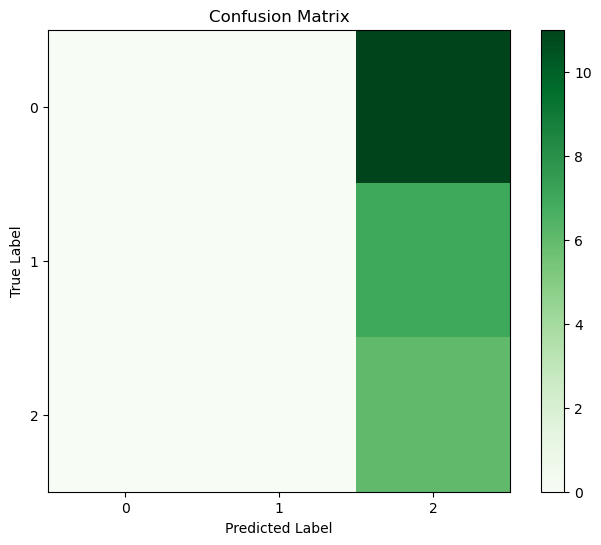

In [504]:
#Your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

#classifier performace
conf_matrix = confusion_matrix(test_labels, predictions)
class_report = classification_report(test_labels, predictions, zero_division=1)

#show confusion matrix + classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

#confusion matrix visual
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
class_labels = np.unique(test_labels)
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


##### 11) Were you able to make improvements to your classifier? Why or why not? Hint: Naive Bayes is generally pretty straight forward to plot and see where the algorithm created boundaries. Use this to help you come to your conclusion.

*Your explanation and supporting content here*
I have traced through the logic of my predict method and others to try to figure out how to improve issues I am having with the predicted labels. I have not yet determined what the exact issue is, but this notebook has my progress so far.

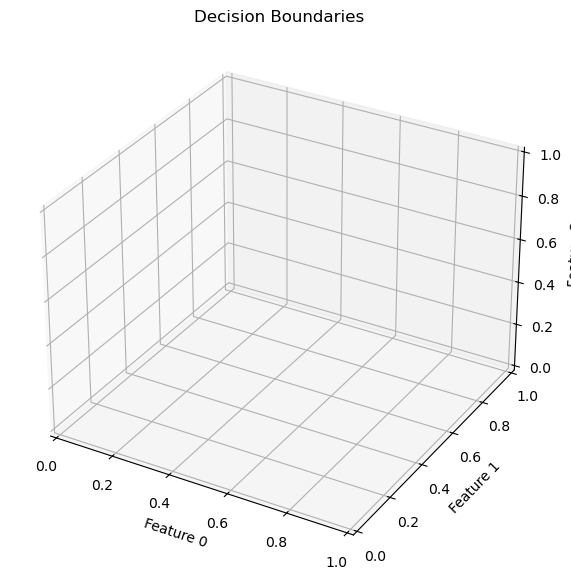

In [519]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#convert class labels to numeric values
label_map = {'0': 0, '1': 1, '2': 2}
numeric_predictions = [label_map[label] for label in predictions]

#decision surface
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

#scatter plot with predictions colored by labels
#ax.scatter(test_features[:, 0], test_features[:, 1], test_features[:, 2], c=numeric_predictions, cmap=plt.cm.Paired)

#labels and title
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')
ax.set_title('Decision Boundaries')

plt.show()
